# Alignment

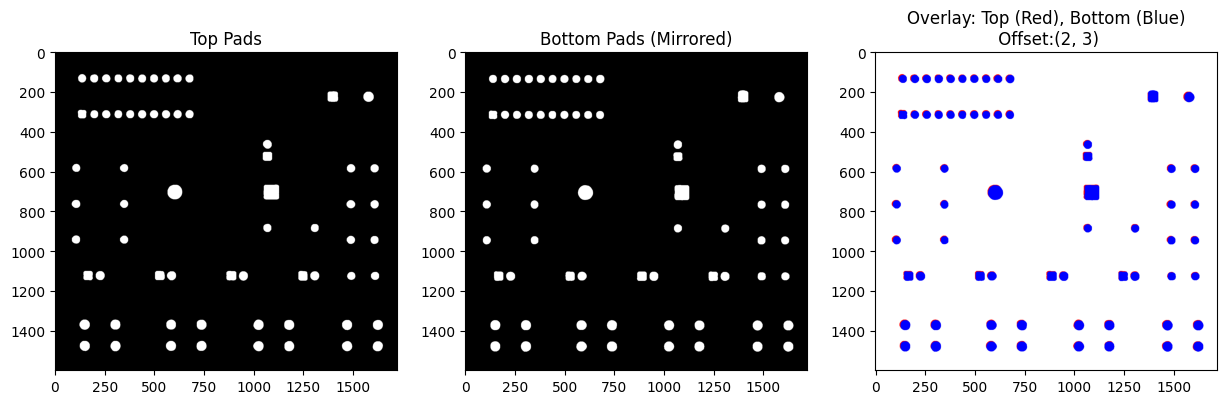

x offset: 0, y offset: 0


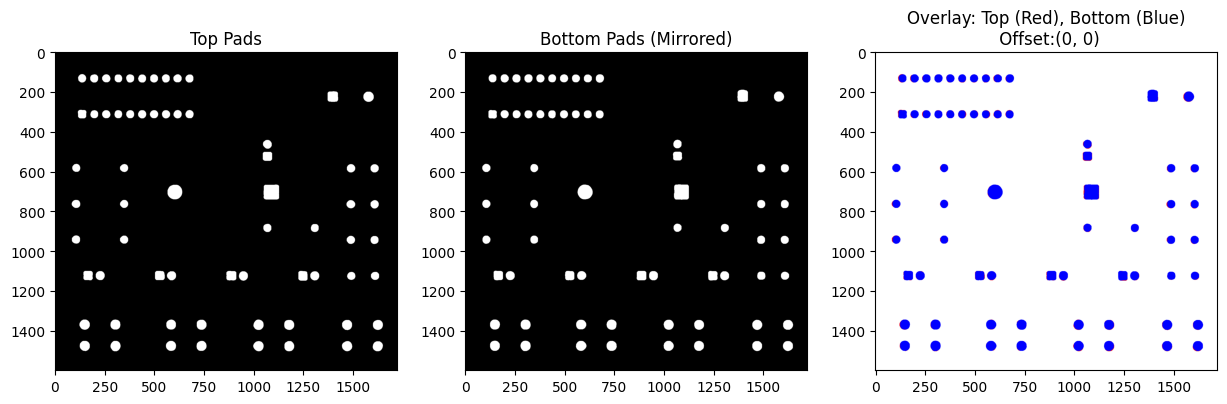

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

top_pads = cv2.imread('images\\pcbs\\0001_bin_alarm\\pad_mask_top.png', cv2.IMREAD_GRAYSCALE)
bot_pads = cv2.imread('images\\pcbs\\0001_bin_alarm\\pad_mask_bottom.png', cv2.IMREAD_GRAYSCALE)

# mirror the bottom pads
bot_pads = np.fliplr(bot_pads)

# Invertiere die Bilder
top_pads = cv2.bitwise_not(top_pads)
bot_pads = cv2.bitwise_not(bot_pads)

# Berechne den Versatz zwischen den Bildern mit Phasen-Korrelation
# Die Funktion erwartet Bilder als Gleitkommazahlen (32-bit float)
top_pads_float = np.float32(top_pads)
bot_pads_float = np.float32(bot_pads)

# Verwende cv2.phaseCorrelate, um den Versatz zu berechnen
shift = cv2.phaseCorrelate(top_pads_float, bot_pads_float)
x_offset, y_offset = np.round(shift[0], 0).astype(int)

# Erstelle ein Overlay-Bild in Farbe (RGB) mit einem weißen Hintergrund
overlay = np.ones((top_pads.shape[0], top_pads.shape[1], 3), dtype=np.uint8) * 255  # Weißer Hintergrund (255, 255, 255)

# Setze die Top-Pads in Rot (255, 0, 0) und die Bottom-Pads in Blau (0, 0, 255)
overlay[top_pads > 0] = [255, 0, 0]  # Rot für Top-Pads
overlay[bot_pads > 0] = [0, 0, 255]  # Blau für Bottom-Pads

# Zeige das Overlay-Bild
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(top_pads, cmap='gray')
ax[0].set_title("Top Pads")
ax[1].imshow(bot_pads, cmap='gray')
ax[1].set_title("Bottom Pads (Mirrored)")
ax[2].imshow(overlay)
ax[2].set_title(f"Overlay: Top (Red), Bottom (Blue)\n Offset:({x_offset}, {y_offset})")

plt.show()

# shift the bottom pads to the right
bot_pads = np.roll(bot_pads, -x_offset, axis=1)

# shift the bottom pads to the bottom
bot_pads = np.roll(bot_pads, -y_offset, axis=0)

# Berechne den Versatz zwischen den Bildern mit Phasen-Korrelation
# Die Funktion erwartet Bilder als Gleitkommazahlen (32-bit float)
top_pads_float = np.float32(top_pads)
bot_pads_float = np.float32(bot_pads)

# Verwende cv2.phaseCorrelate, um den Versatz zu berechnen
shift = cv2.phaseCorrelate(top_pads_float, bot_pads_float)
x_offset_new, y_offset_new = np.round(shift[0], 0).astype(int)

# Ergebnisse ausgeben
print(f"x offset: {x_offset_new}, y offset: {y_offset_new}")



# Erstelle ein Overlay-Bild in Farbe (RGB) mit einem weißen Hintergrund
overlay = np.ones((top_pads.shape[0], top_pads.shape[1], 3), dtype=np.uint8) * 255  # Weißer Hintergrund (255, 255, 255)

# Setze die Top-Pads in Rot (255, 0, 0) und die Bottom-Pads in Blau (0, 0, 255)
overlay[top_pads > 0] = [255, 0, 0]  # Rot für Top-Pads
overlay[bot_pads > 0] = [0, 0, 255]  # Blau für Bottom-Pads

# Zeige das Overlay-Bild
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(top_pads, cmap='gray')
ax[0].set_title("Top Pads")
ax[1].imshow(bot_pads, cmap='gray')
ax[1].set_title("Bottom Pads (Mirrored)")
ax[2].imshow(overlay)
ax[2].set_title(f"Overlay: Top (Red), Bottom (Blue)\n Offset:({x_offset_new}, {y_offset_new})")

plt.show()



# Align Trace Masks

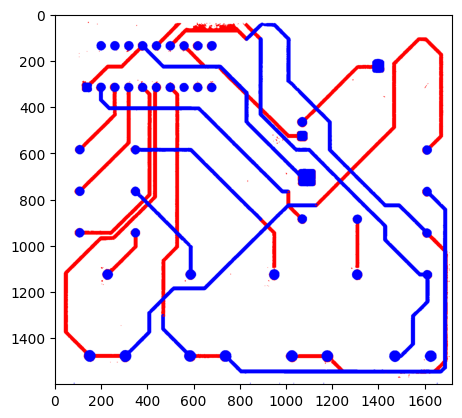

In [4]:
top_trace = cv2.imread('images\\pcbs\\0001_bin_alarm\\trace_mask_top.png', cv2.IMREAD_GRAYSCALE)
bot_trace = cv2.imread('images\\pcbs\\0001_bin_alarm\\trace_mask_bottom.png', cv2.IMREAD_GRAYSCALE)

# mirror the bottom traces
bot_trace = np.fliplr(bot_trace)

# invert the images
top_trace = cv2.bitwise_not(top_trace)
bot_trace = cv2.bitwise_not(bot_trace)

# shift the bottom traces to the right
bot_trace = np.roll(bot_trace, -x_offset, axis=1)
# shift the bottom traces to the bottom
bot_trace = np.roll(bot_trace, -y_offset, axis=0)

# Konturen durchlaufen und zeichnen
def draw_contours_by_level(image, contours, hierarchy, color):
    for i, _ in enumerate(contours):
        # Bestimme das Level der aktuellen Kontur
        level = 0
        h = hierarchy[0][i]
        while h[3] != -1:
            level += 1
            h = hierarchy[0][h[3]]
        
        # Zeichne die Konturen auf dem Bild
        if level == 1:
            cv2.drawContours(image, contours, i, color, -1)  # Kontur füllen (-1 für Füllung)
        else:
            pass
            #cv2.drawContours(image, contours, i, (0,255,0), -1)
    return image

# find contours
overlay2 = overlay.copy()
contours, hierarchy = cv2.findContours(top_trace, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw top traces in red and bottom traces in blue
draw_contours_by_level(overlay2, contours, hierarchy, (255, 0, 0))
contours, hierarchy = cv2.findContours(bot_trace, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
draw_contours_by_level(overlay2, contours, hierarchy, (0, 0, 255))

# Zeige das Overlay-Bild
plt.imshow(overlay2)


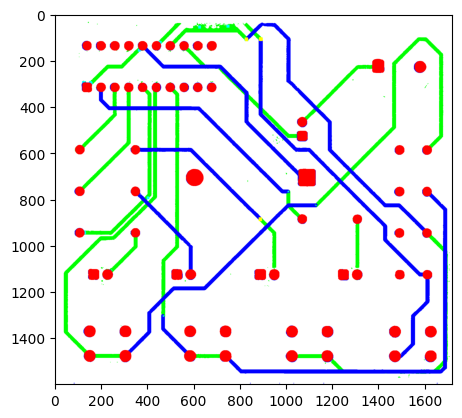

In [54]:
# Detect pads and corresponding traces
# Find contours in the top and bottom traces
contours_top, hierarchy_top = cv2.findContours(top_trace, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_bot, hierarchy_bot = cv2.findContours(bot_trace, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the contours of the pads
contours_pads_top, hierarchy_pads_top = cv2.findContours(top_pads, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_pads_bot, hierarchy_pads_bot = cv2.findContours(bot_pads, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a net list containing the pads and traces
net_list = []

def enlarge_contours(contour, enlargement_factor=10):
    """
    Vergrößert die Kontur durch Anwendung der Dilatation.
    """
    # Erstelle eine leere Maske mit der Größe des Bildes
    mask = np.zeros((1000, 1000), dtype=np.uint8)  # Ändere die Größe nach Bedarf

    # Zeichne die Kontur auf die Maske
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    
    # Vergrößere die Kontur durch Dilation
    kernel = np.ones((enlargement_factor, enlargement_factor), np.uint8)
    dilated_mask = cv2.dilate(mask, kernel, iterations=1)
    
    # Finde die neuen Konturen nach der Dilation
    new_contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return new_contours[0] if new_contours else contour

def extract_traces(contours, hierarchy, net_list, layer):
    # Loop over each contour and its corresponding hierarchy
    for i, contour in enumerate(contours):
        # Start by determining the level of the current contour (nesting depth)
        level = 0
        h = hierarchy[0][i]
        parent_idx = h[3]  # h[3] is the index of the parent contour
        
        # Traverse the hierarchy upwards to determine the contour's level
        while parent_idx != -1:
            level += 1
            parent_idx = hierarchy[0][parent_idx][3]
        
        # Process only if the contour is at level 1 (inside another contour)
        if level == 1:
            idx = len(net_list)

            # Collect all via contours (siblings) by traversing the hierarchy
            via_contours = []
            child_idx = h[2]  # h[2] is the index of the first child contour

            # Traverse all sibling contours (vias) at the same level
            while child_idx != -1:
                via_contour = contours[child_idx]
                enlarged_via_contour = enlarge_contours(via_contour)
                via_contours.append(enlarged_via_contour)
                child_idx = hierarchy[0][child_idx][0]  # Move to the next sibling contour

            trace_contour = contour
            # Append the current contour and its corresponding via contours to the net_list
            net_list.append([idx, trace_contour, None, via_contours if via_contours else None, layer])
    
    return net_list

def extract_pads(contours, hierarchy, net_list, layer):
    for i, contour in enumerate(contours):
        # Start by determining the level of the current contour (nesting depth)
        level = 0
        h = hierarchy[0][i]
        parent_idx = h[3]  # h[3] is the index of the parent contour
        
        # Traverse the hierarchy upwards to determine the contour's level
        while parent_idx != -1:
            level += 1
            parent_idx = hierarchy[0][parent_idx][3]
        
        # Process only if the contour is at level 0
        if level == 0:
            idx = len(net_list)

            # Collect all via contours (siblings) by traversing the hierarchy
            pad_contour = contour
            net_list.append([idx, None, pad_contour, None, layer])
    
    return net_list

# Iterate over the top traces
net_list = extract_traces(contours_top, hierarchy_top, net_list, layer=1)

# Iterate over the bottom traces
net_list = extract_traces(contours_bot, hierarchy_bot, net_list, layer=2)

# Iterate over the top pads
net_list = extract_pads(contours_pads_top, hierarchy_pads_top, net_list, layer=1)

# Iterate over the bottom pads
net_list = extract_pads(contours_pads_bot, hierarchy_pads_bot, net_list, layer=2)

# Draw each net on the overlay image
white_back = np.ones((top_pads.shape[0], top_pads.shape[1], 3), dtype=np.uint8) * 255  # White background

for net in net_list:
    # Extract the trace and via contours from the net
    trace_contour = net[1]
    pad_contour = net[2]
    via_contours = net[3]  # This is now a list of contours or None

    pad_color = (0, 0, 255) if net[4] == 1 else (255, 0, 0)
    trace_color = (0, 255, 0) if net[4] == 1 else (0, 0, 255)
    via_color = (0, 255, 255) if net[4] == 1 else (255, 255, 0)

    # layer alpha
    layer = net[4]
    
    
    # Draw the trace contour in green
    if trace_contour is not None:
        cv2.drawContours(white_back, [trace_contour], -1, trace_color, -1)  # Make sure to pass a list of contours
    
    # Draw the pad contour in red
    if pad_contour is not None:
        cv2.drawContours(white_back, [pad_contour], -1, pad_color, -1)  # Make sure to pass a list of contours
    
    # Draw all the via contours in yellow
    if via_contours is not None:
        for via_contour in via_contours:
            cv2.drawContours(white_back, [via_contour], -1, via_color, -1)  # Loop over each via contour

# Display the overlay image with the trace and via contours
plt.imshow(white_back, cmap='hsv')
plt.show()



        


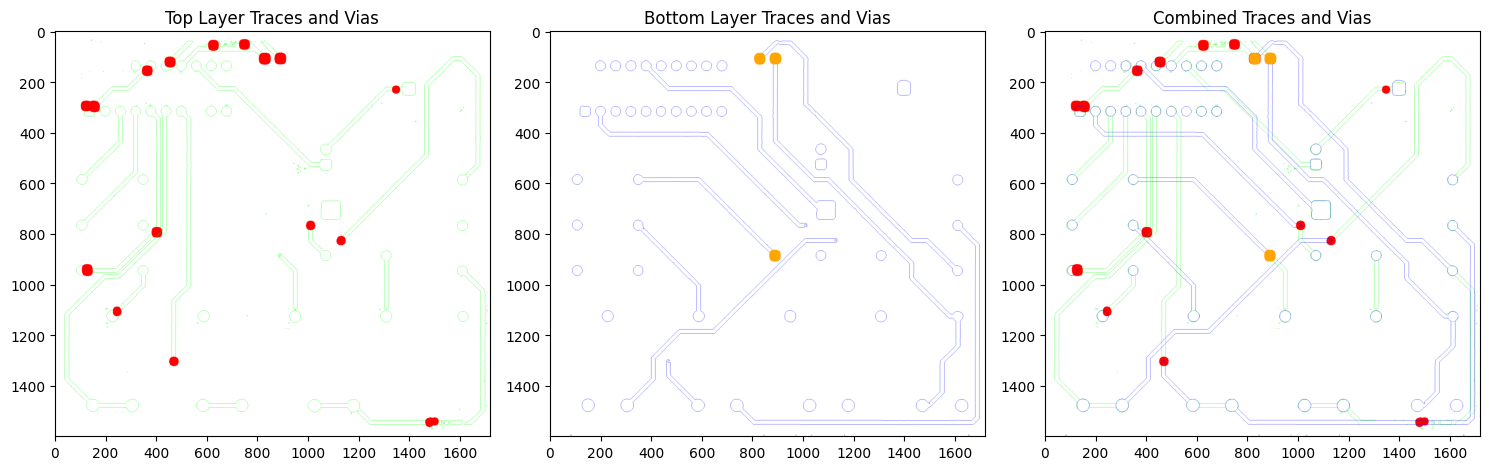

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def plot_traces_and_vias(net_list, image_shape):
    # Erstelle drei leere Bilder für die Plots
    top_image = np.ones((image_shape[0], image_shape[1], 3), dtype=np.uint8) * 255  # Weißer Hintergrund
    bottom_image = np.ones((image_shape[0], image_shape[1], 3), dtype=np.uint8) * 255  # Weißer Hintergrund
    combined_image = np.ones((image_shape[0], image_shape[1], 3), dtype=np.uint8) * 255  # Weißer Hintergrund

    # Farben für die Vias und Traces
    top_trace_color = (0, 255, 0)  # Grün für Traces auf Top-Layer
    bottom_trace_color = (0, 0, 255)  # Blau für Traces auf Bottom-Layer
    top_via_color = (255, 0, 0)  # Rot für Vias auf Top-Layer
    bottom_via_color = (255, 165, 0)  # Orange für Vias auf Bottom-Layer
    combined_trace_color_top = (0, 255, 0)  # Grün für Combined-Layer (Top Traces)
    combined_trace_color_bottom = (0, 0, 255)  # Blau für Combined-Layer (Bottom Traces)
    combined_via_color_top = (255, 0, 0)  # Rot für Combined-Layer (Top Vias)
    combined_via_color_bottom = (255, 165, 0) # Orange für Combined-Layer (Bottom Vias)

    # Iteriere durch die net_list und zeichne die Traces und Vias auf die entsprechenden Bilder
    for net in net_list:
        trace_contour = net[1]  # Trace (Kontur)
        via_contours = net[3]  # Vias (Liste von Konturen)
        layer = net[4]  # Layer Information (1 = Top, 2 = Bottom)

        # Zeichne Traces
        if trace_contour is not None:
            if layer == 1:  # Top Layer
                cv2.drawContours(top_image, [trace_contour], -1, top_trace_color, 1)  # Zeichne auf Top-Layer Bild
                cv2.drawContours(combined_image, [trace_contour], -1, combined_trace_color_top, 1)  # Zeichne auf Combined Bild (Top)
            elif layer == 2:  # Bottom Layer
                cv2.drawContours(bottom_image, [trace_contour], -1, bottom_trace_color, 1)  # Zeichne auf Bottom-Layer Bild
                cv2.drawContours(combined_image, [trace_contour], -1, combined_trace_color_bottom, 1)  # Zeichne auf Combined Bild (Bottom)

        # Zeichne Vias
        if via_contours is not None:
            for via_contour in via_contours:
                if layer == 1:  # Top Layer
                    cv2.drawContours(top_image, [via_contour], -1, top_via_color, 30)  # Zeichne auf Top-Layer Bild
                    cv2.drawContours(combined_image, [via_contour], -1, combined_via_color_top, 30)  # Zeichne auf Combined Bild (Top)
                elif layer == 2:  # Bottom Layer
                    cv2.drawContours(bottom_image, [via_contour], -1, bottom_via_color, 30)  # Zeichne auf Bottom-Layer Bild
                    cv2.drawContours(combined_image, [via_contour], -1, combined_via_color_bottom, 30)  # Zeichne auf Combined Bild (Bottom)

    # Erstelle Subplots für die drei Bilder
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(top_image)
    ax[0].set_title('Top Layer Traces and Vias')

    ax[1].imshow(bottom_image)
    ax[1].set_title('Bottom Layer Traces and Vias')

    ax[2].imshow(combined_image)
    ax[2].set_title('Combined Traces and Vias')

    plt.tight_layout()
    plt.show()

# Beispielaufruf der Funktion mit net_list und Bildgröße
image_shape = top_pads.shape
plot_traces_and_vias(net_list, image_shape)




In [59]:
image_shape = top_pads.shape

def group_nets_by_overlap(net_list):
    """
    Group nets based on the overlap between pads, vias, and traces,
    but excluding trace-trace overlap.
    """
    def contours_overlap(contour1, contour2):
        """ Check if two contours overlap using bounding rectangles and intersection tests. """
        rect1 = cv2.boundingRect(contour1)
        rect2 = cv2.boundingRect(contour2)
        
        # Check if rectangles intersect
        if (rect1[0] < rect2[0] + rect2[2] and
            rect1[0] + rect1[2] > rect2[0] and
            rect1[1] < rect2[1] + rect2[3] and
            rect1[1] + rect1[3] > rect2[1]):
            # Perform more accurate check with mask intersection
            mask1 = np.zeros(image_shape[:2], dtype=np.uint8)
            mask2 = np.zeros(image_shape[:2], dtype=np.uint8)
            cv2.drawContours(mask1, [contour1], -1, 255, -1)
            cv2.drawContours(mask2, [contour2], -1, 255, -1)
            intersection = np.logical_and(mask1, mask2)
            return np.any(intersection)
        return False

    grouped_nets = []
    
    for net in net_list:
        net_grouped = False
        trace_contour = net[1]
        pad_contours = net[2] if net[2] is not None else []
        via_contours = net[3] if net[3] is not None else []

        # List to store indices of groups that overlap with the current net
        overlapping_groups = []

        # Iterate over existing groups to find overlap with pads, vias, or traces (ignoring trace-trace overlap)
        for group_idx, group in enumerate(grouped_nets):
            group_has_overlap = False

            for existing_net in group:
                existing_trace = existing_net[1]
                existing_pads = existing_net[2] if existing_net[2] is not None else []
                existing_vias = existing_net[3] if existing_net[3] is not None else []

                # We don't check trace-trace overlap

                # Check if the current pads overlap with existing pads or traces in the group
                for pad in pad_contours:
                    for existing_pad in existing_pads:
                        if contours_overlap(pad, existing_pad):
                            group_has_overlap = True
                    if existing_trace is not None and contours_overlap(pad, existing_trace):
                        group_has_overlap = True
                
                # Check if vias overlap with existing vias or traces
                for via in via_contours:
                    for existing_via in existing_vias:
                        if contours_overlap(via, existing_via):
                            print("via-via overlap")
                            group_has_overlap = True
                    if existing_trace is not None and contours_overlap(via, existing_trace):
                        print("via-trace overlap")
                        group_has_overlap = True

            if group_has_overlap:
                overlapping_groups.append(group_idx)

        # Merge overlapping groups
        if overlapping_groups:
            # Merge all overlapping groups and add the current net
            merged_group = []
            for group_idx in sorted(overlapping_groups, reverse=True):
                merged_group.extend(grouped_nets.pop(group_idx))
            merged_group.append(net)
            grouped_nets.append(merged_group)
            net_grouped = True
        else:
            # If no overlap found, create a new group
            grouped_nets.append([net])

    return grouped_nets



grouped_nets = group_nets_by_overlap(net_list)

# Display the number of groups and the nets in each group
for idx, group in enumerate(grouped_nets):
    print(f"Group {idx + 1}:")
    for net in group:
        print(f"  Net ID: {net[0]}")


via-via overlap
via-via overlap
Group 1:
  Net ID: 1
Group 2:
  Net ID: 2
Group 3:
  Net ID: 4
Group 4:
  Net ID: 6
Group 5:
  Net ID: 7
Group 6:
  Net ID: 8
Group 7:
  Net ID: 9
Group 8:
  Net ID: 10
Group 9:
  Net ID: 11
Group 10:
  Net ID: 12
Group 11:
  Net ID: 13
Group 12:
  Net ID: 14
Group 13:
  Net ID: 15
Group 14:
  Net ID: 16
Group 15:
  Net ID: 17
Group 16:
  Net ID: 18
Group 17:
  Net ID: 20
Group 18:
  Net ID: 21
Group 19:
  Net ID: 22
Group 20:
  Net ID: 23
Group 21:
  Net ID: 24
Group 22:
  Net ID: 25
Group 23:
  Net ID: 27
Group 24:
  Net ID: 28
Group 25:
  Net ID: 29
Group 26:
  Net ID: 30
Group 27:
  Net ID: 31
Group 28:
  Net ID: 33
Group 29:
  Net ID: 34
Group 30:
  Net ID: 37
Group 31:
  Net ID: 41
Group 32:
  Net ID: 42
Group 33:
  Net ID: 43
Group 34:
  Net ID: 44
Group 35:
  Net ID: 46
Group 36:
  Net ID: 47
Group 37:
  Net ID: 48
Group 38:
  Net ID: 49
Group 39:
  Net ID: 50
Group 40:
  Net ID: 51
Group 41:
  Net ID: 52
Group 42:
  Net ID: 53
Group 43:
  Net ID

via-via overlap
via-via overlap


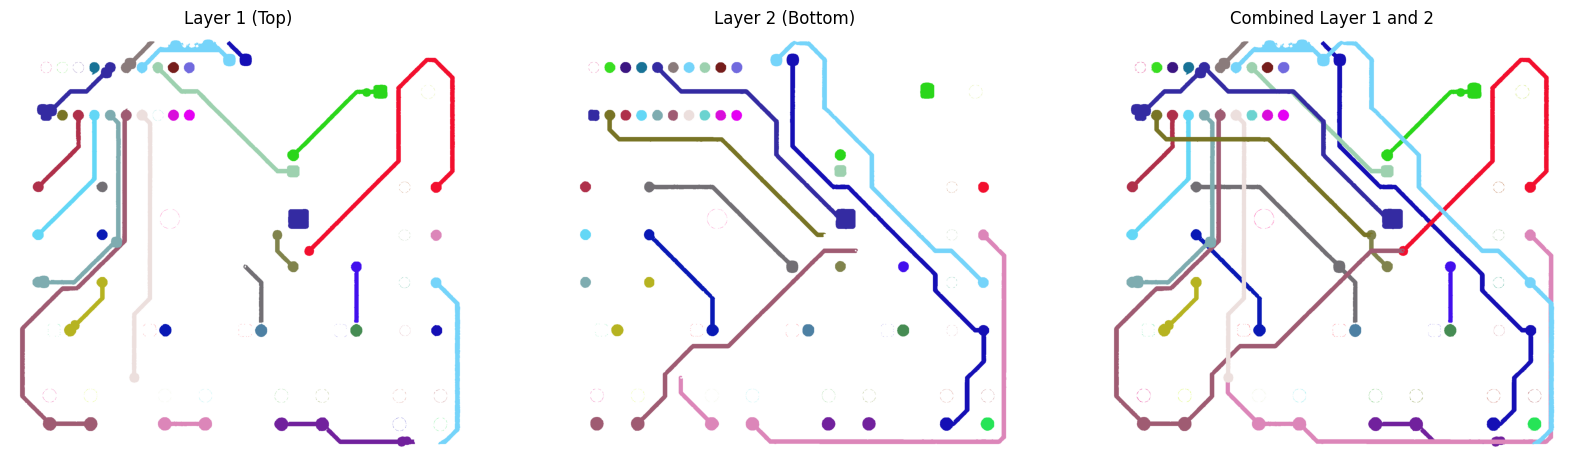

In [61]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random

def get_group_color(base_color, layer):
    """ Modify the color saturation depending on the layer. """
    #if layer == 1:
    return base_color  # Full saturation for layer 1
    #else:
    #    # Lighten the color for layer 2 by blending with white
    #    return [int(0.7 * c + 0.3 * 255) for c in base_color]

def draw_contours_with_groups(grouped_nets, image_shape):
    """ Draw grouped nets with separate plots for top and bottom layers, and a combined plot. """
    # Create three white backgrounds: Layer 1 (Top), Layer 2 (Bottom), and a combined view
    white_back_top = np.ones((image_shape[0], image_shape[1], 3), dtype=np.uint8) * 255
    white_back_bottom = np.ones((image_shape[0], image_shape[1], 3), dtype=np.uint8) * 255
    white_back_combined = np.ones((image_shape[0], image_shape[1], 3), dtype=np.uint8) * 255

    # Iterate over grouped nets and assign colors
    for group in grouped_nets:
        # Get a random base color for the current group
        base_color = [random.randint(0, 255) for _ in range(3)]
        
        # Iterate over nets in the group
        for net in group:
            trace_contour = net[1]
            pad_contours = net[2]
            via_contours = net[3]
            layer = net[4]

            # Depending on the layer, draw on the corresponding background with modified color
            if layer == 1:
                background = white_back_top
            else:
                background = white_back_bottom

            # Get the appropriate color for the current layer
            group_color = get_group_color(base_color, layer)

            # Draw the trace in group color
            if trace_contour is not None:
                cv2.drawContours(background, [trace_contour], -1, group_color, -1)  # Filled contours
                cv2.drawContours(white_back_combined, [trace_contour], -1, group_color, -1)  # Draw on combined

            # Draw the pads in the same group color
            if pad_contours is not None:
                for pad in pad_contours:
                    cv2.drawContours(background, [pad], -1, group_color, -1)
                    cv2.drawContours(white_back_combined, [pad], -1, group_color, -1)

            # Draw the vias in the same group color
            if via_contours is not None:
                for via in via_contours:
                    cv2.drawContours(background, [via], -1, group_color, 30)
                    cv2.drawContours(white_back_combined, [via], -1, group_color, 30)

    # Plot the results
    fig, ax = plt.subplots(1, 3, figsize=(20, 10))

    ax[0].imshow(cv2.cvtColor(white_back_top, cv2.COLOR_BGR2RGB))  # Top layer (Layer 1)
    ax[0].set_title('Layer 1 (Top)')
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(white_back_bottom, cv2.COLOR_BGR2RGB))  # Bottom layer (Layer 2)
    ax[1].set_title('Layer 2 (Bottom)')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(white_back_combined, cv2.COLOR_BGR2RGB))  # Combined view
    ax[2].set_title('Combined Layer 1 and 2')
    ax[2].axis('off')

    plt.show()

# Assuming grouped_nets is the result from the previous function and top_pads.shape gives the image dimensions
image_shape = top_pads.shape  # (height, width)
#grouped_nets = group_nets_by_overlap(net_list)

# Draw the grouped nets with three visualizations
draw_contours_with_groups(grouped_nets[108:], image_shape)
